# Lab 5
written by: Matthew Prinz, Jimmy Phan, Yash Parakh

## Problem 1

This paper summarizes the mathematical processes involved in communnicating information from one point to another. The basic components of a communication channel include a sender, a transmitter, a channel of communication, a reciever and the reciever. Various types of data can be transmitted across such a communication channel. The true amount of information that needs to be transmitted is given the entropy of the data. Since this type of communication is stochastic process, it can be modeled using a Markov chain. 

## Problem 2

In [0]:
from bs4 import BeautifulSoup
import requests
import shutil

In [0]:
page_info = requests.get('http://proceedings.mlr.press/v97/')
page_info

<Response [200]>

In [0]:
soup = BeautifulSoup(page_info.text)

ONLY UNCOMMENT THE BELOW WHEN YOU RUN IT THE FIRST TIME. 

In [0]:
# There are 773 pdfs to download.
# Possible parallelize this for speed? very extra, but would help

number_papers = 0

for link in soup.find_all('a'):
    url = link.get('href')
    if url[-4:] == '.pdf' and 'supp' not in url:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            with open(str(number_papers) + '.pdf', 'wb') as out_file:
                response.raw.decode_content = True
                shutil.copyfileobj(response.raw, out_file)
        else:
            print(f'{url} is boom')
        number_papers += 1
        

In [0]:
!pip install tika

In [0]:
from tika import parser
import re
pat = re.compile(r"([A-Za-z'-]+-\n[A-za-z']+)|([A-Za-z'-]+)")
number_papers = 773
all_words = []
for i in range(number_papers):
    raw = parser.from_file(str(i) + '.pdf')
    all_words.extend(re.findall(pat, raw['content'])) 


2019-10-08 19:35:24,082 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar to /tmp/tika-server.jar.
2019-10-08 19:35:27,282 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar.md5 to /tmp/tika-server.jar.md5.
2019-10-08 19:35:27,702 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2019-10-08 19:35:32,710 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [0]:
it = iter(all_words)
all_words_cleaned = []
for tupl in all_words:
    if tupl[0] == '':
        all_words_cleaned.append(tupl[1])
    elif tupl[1] == '':
        interrupted_word = tupl[0]
        right_word = interrupted_word.replace('\n', '')
        right_word = right_word.replace('-', '')
        all_words_cleaned.append(right_word)
    else:
        print(f'Tupl[0] is: {tupl[0]}. Tupl[1] is: {tupl[1]}.')

In [0]:
dict_of_words = {}
for word in all_words_cleaned:
    temp = word.lower()
    if temp not in dict_of_words.keys():
        dict_of_words[temp] = 1
    else:
        dict_of_words[temp] += 1

sorted_d = sorted(dict_of_words.items(), key=lambda x: x[1], reverse=True)


In [0]:
# Problem 2.1
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
 
sorted_d = dict(sorted_d)
i = 1
for k in sorted_d.keys():
    if i < 11 and k not in stop_words and len(k) > 1:
        print(f'{i}: {k} occured {dict(sorted_d)[k]} times')
        i += 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1: et occured 32561 times
2: al occured 32443 times
3: learning occured 25205 times
4: model occured 15169 times
5: data occured 13343 times
6: algorithm occured 12114 times
7: neural occured 10799 times
8: function occured 10263 times
9: training occured 10214 times
10: set occured 10066 times


In [0]:
# Problem 2.2
import random
import numpy as np
d_of_prob = {}
total_number_words = sum(sorted_d.values())
for k, v in sorted_d.items():
    d_of_prob[k] = v / total_number_words

population = list(d_of_prob.keys())
weights = list(d_of_prob.values())
pop_np = np.array(population)
weights_np = np.array(weights)
log_weights = np.log2(weights_np)
print(f'H(X) is {-1*np.sum(weights_np*log_weights)}')

H(X) is 10.355174214701613


In [0]:
# Problem 2.3
# Let's say a paragraph is about 100 words.
random.seed(1)
paragraph = []
for i in range(100):
    word = str(random.choices(population, weights))
    # choices returns a list representation, e.g. ['in']. This splices out the ['']
    word = word[2:-2] 
    paragraph.append(word)
    
for i, word in enumerate(paragraph):
    if i % 10 == 0 and i != 0:
        print(f'. {word} ')
    elif i % 10 == 9 and i != 0:
        print(word, end = '')
    else:
        print(word, end = ' ')

in citation coordinate as matrix one out comparable and the. defines 
o resnet the also losses on aka weston the. the 
org generalised w x arxiv the on such theorem. with 
with x has this the employed objective observed for. swol 
revenue a e losses correspondence conditionals arxiv poor being. learning 
journal calculation simulations same prediction the t reference training. is 
https whose initial which u parameters identify samples v. international 
the the zi gerds descent v is space ird. tensor 
via critic with some culture convex has al layer. xavier 
the mathematics heuristic tuple epoch diffusion error how models

## Problem 3



In [0]:
# Problem 3
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from scipy.special import expit  # sigmoid function
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv("wells.dat", delimiter=" ")
print(df.shape)
# df2 = pd.read_stata("all.dta")
# df

(3020, 5)


Logistic Regression coef: [[ 0.30242737 -0.00620473]]
lower distances above 0 indicating more likely to switch wells
split data based on probability of switching


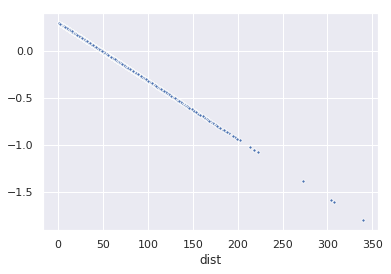

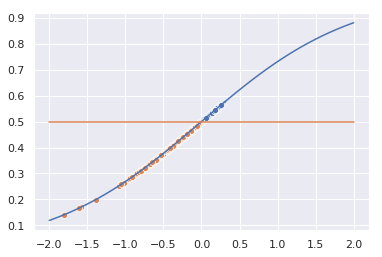

In [0]:
# get only the offset term and nearest safe well
num_features = df.shape[0]
data = pd.DataFrame({"offset": np.ones(num_features), "dist": df['dist']})
switch = np.array(df['switch'])
#print(switch.shape)

# fit logistic regression model
lr = LogisticRegression().fit(data, switch)
print(f"Logistic Regression coef: {lr.coef_}")
#print(lr.coef_.shape, data.shape)

# plot line for regression
mapping = np.dot(data, lr.coef_.T)
dist = df['dist']
sns.scatterplot(dist, mapping.reshape(-1), s=10)
print("lower distances above 0 indicating more likely to switch wells")

# plot line onto sigmoid function
ax1, fig1 = plt.subplots()
x = np.linspace(-2, 2, 100)
sns.lineplot(x, expit(x))

# ax2, fig2 = plt.subplots()
sigmoid_function = expit(mapping)
sns.scatterplot(mapping[mapping>0], expit(mapping[mapping>0]).reshape(-1))
sns.scatterplot(mapping[mapping<=0], expit(mapping[mapping<=0].reshape(-1)))
sns.lineplot(x, 0.5)
print("split data based on probability of switching")

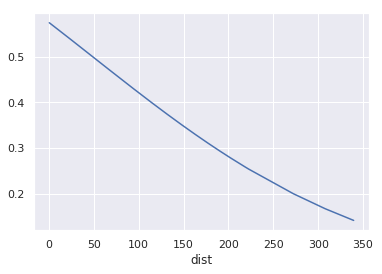

In [0]:
# plot dist vs prob. of switching
ax2, fig2 = plt.subplots()
sns.lineplot(dist, expit(mapping).reshape(-1))

In [0]:
print(f"coef of distance is {lr.coef_[0][1]}")
print(f"Therefore, the change in y for an additional 100 meters is {lr.coef_[0][1]*100}")
print(f"By the rule-of-4, the change in probability is at most {lr.coef_[0][1]*100/4}")

coef of distance is -0.0062047320281091315
Therefore, the change in y for an additional 100 meters is -0.6204732028109131
By the rule-of-4, the change in probability is at most -0.15511830070272828


In [0]:
# add in arsenic levels to logistic regression
data2 = data.join(df['arsenic'])
switch = np.array(df['switch'])

# fit logistic regression model
lr = LogisticRegression().fit(data2, switch)
print(f"Logistic Regression coef: {lr.coef_}")

Logistic Regression coef: [[ 0.00186056 -0.0089613   0.45997859]]


In [0]:
# normalize both distance and arsenic levels
from sklearn import preprocessing
norm_dist = preprocessing.normalize(np.array(df['dist']).reshape(1, -1))
norm_arsenic = preprocessing.normalize(np.array(df['arsenic']).reshape(1, -1))
switch = np.array(df['switch'])

# fit linear regression on normalized data
data_norm = pd.DataFrame({"offset":np.ones(num_features), "dist":norm_dist.reshape(num_features), "arsenic":norm_arsenic.reshape(num_features)})
lr_norm = LogisticRegression().fit(data_norm, switch)

print(f"Logistic Regression coef for normalized features: {lr_norm.coef_}")
print("Based on the coefficients, the arsenic level appears to affect the prob. more")

# fit all features on the model with interaction term
data_norm = df.loc[:, df.columns != 'switch']
data_norm = preprocessing.normalize(data_norm.values)

interaction = data_norm[:, 0]*data_norm[:, 1].T
interaction = interaction.reshape(-1, 1)
data_norm = np.append(data_norm, interaction, axis=1)

lrCV = LogisticRegressionCV(cv=5, penalty='l2')
lrCV.fit(data_norm, switch)

print(f'\nThe error with all the features and interaction term is {lrCV.score(data_norm, switch)}')

Logistic Regression coef for normalized features: [[ 0.14489328 -1.8562813   2.60912918]]
Based on the coefficients, the arsenic level appears to affect the prob. more

The error with all the features and interaction term is 0.6135761589403973


## Problem 4

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from PIL import Image

In [0]:
X, y = fetch_openml(data_id=40926, return_X_y=True)
data = fetch_openml(data_id=40926)

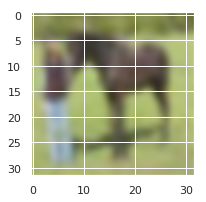

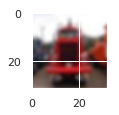

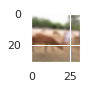

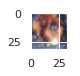

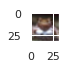

In [0]:
start = 111
for i in range(5):
    arr = data.data[294+i]
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0
    img = np.dstack((R,G,B))
    fig = plt.figure(figsize=(3,3))

    ax = fig.add_subplot(start)
    start += 10
    ax.imshow(img,interpolation='bicubic')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
t0 = time.time()
l1_model = LogisticRegressionCV(cv=3, penalty='l1', multi_class='multinomial',solver='saga', tol = 0.1).fit(X_train, y_train)
l2_model = LogisticRegressionCV(cv=3, penalty='l2', multi_class='multinomial',solver='saga', tol = 0.1).fit(X_train, y_train)

print(f'Time taken: {time.time()-t0}')

Time taken: 344.9475517272949


In [0]:
from sklearn.metrics import mean_squared_error
y_pred_l1 = l1_model.predict(X_test)
y_pred_l2 = l2_model.predict(X_test)
mse_l1 = mean_squared_error(y_test, y_pred_l1)
mse_l2 = mean_squared_error(y_test, y_pred_l2)
train_error_l1 = mean_squared_error(l1_model.predict(X_train), y_train)
train_error_l2 = mean_squared_error(l2_model.predict(X_train), y_train)
print(f'For L1, training error = {train_error_l1}. Test error = {mse_l1}.')
print(f'For L2 training error = {train_error_l2} Test error = {mse_l2}.')


ValueError: ignored

In [0]:
# last prob: find coefs that are close to 0. set them equal to 0. report new sparsity.
coefs_matrix = l1_model.coef_
total_number_of_coefs = 0
sparsity = 0
for coef_list in coefs_matrix:
    total_number_of_coefs += len(coef_list)
    i_dist = np.abs(coef_list)
    for coef in coef_list:
        if coef < 1e-8:
            sparsity += 1
print(f'We can make our solution {sparsity}-sparse, without affecting the test error too much.')

## Problem 5

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from PIL import Image

In [0]:
X, y = fetch_openml(data_id=554, return_X_y=True)

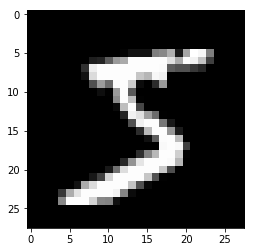

In [0]:
# one of the training images
dim = 28
im = X[0].reshape(dim, dim)
plt.gray()
plt.imshow(im)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42)

In [0]:
t0 = time.time()
l1_model = LogisticRegressionCV(cv=3, penalty='l1', multi_class='multinomial',solver='saga', tol = 0.1).fit(X_train, y_train)
print(f'Time taken: {time.time()-t0}')

Time taken: 234.23250126838684


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
y_pred = l1_model.predict(X_test)
print(f'Test error is: {mean_squared_error(y_test, y_pred)}. Training error is: {mean_squared_error(l1_model.predict(X_train), y_train)}.')
print(f'Accuracy is: {accuracy_score(y_test, l1_model.predict(X_test))}')

Test error is: 1.313845525966738. Training error is: 1.148573896576355.
Accuracy is: 0.9209264360779512


In [0]:
# last prob: find coefs that are close to 0. set them equal to 0. report new sparsity.
coefs_matrix = l1_model.coef_
total_number_of_coefs = 0
sparsity = 0
for coef_list in coefs_matrix:
    total_number_of_coefs += len(coef_list)
    i_dist = np.abs(coef_list)
    for coef in coef_list:
        if coef < 1e-8:
            sparsity += 1
print(f'We can make our solution {sparsity}-sparse, without affecting the test error too much.')

We can make our solution 4904-sparse, without affecting the test error too much.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


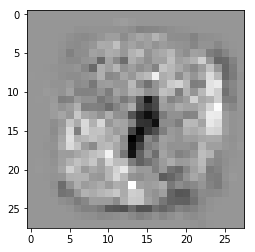

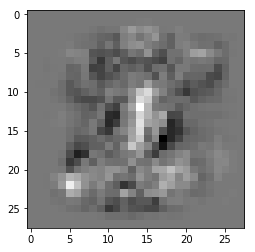

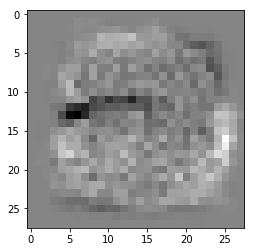

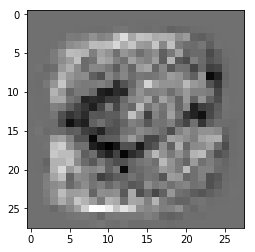

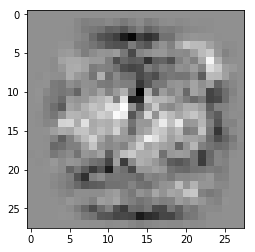

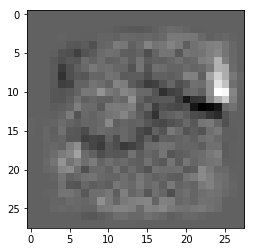

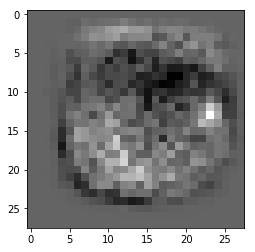

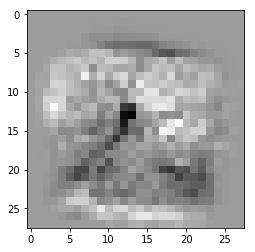

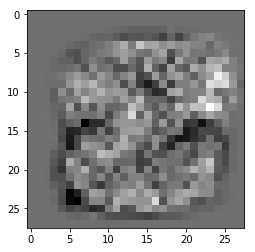

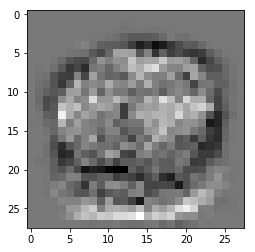

In [0]:
print(l1_model.coef_)

# show the coefficients as an "image"
for i in range(10):
  im = l1_model.coef_[i].reshape(dim, dim)
  plt.gray()
  plt.imshow(im)
  plt.show()